- classes: edible=e, poisonous=p
- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.isna().sum().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
df['class'].unique()

array(['p', 'e'], dtype=object)

### classes: edible=e, poisonous=p

<AxesSubplot:xlabel='class', ylabel='Count'>

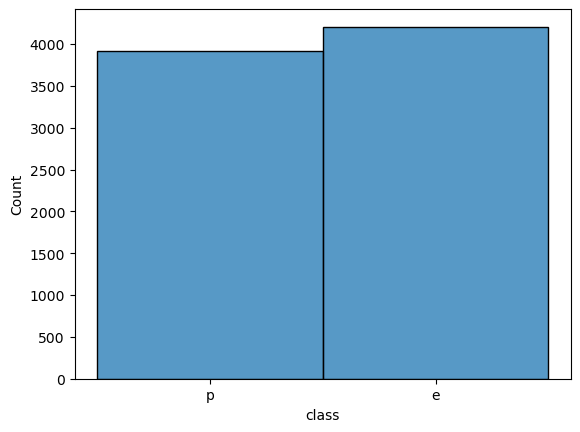

In [8]:
sns.histplot(df['class'])

In [9]:
df = pd.get_dummies(df,drop_first=True)

In [10]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# for col in df.columns:
#     df[col] = label_encoder.fit_transform(df[col])

In [11]:
df.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [12]:
# sns.pairplot(data=df)

### classes: e=0, p=1

In [13]:
X = df.drop(['class_p'],axis=1)
y = df['class_p']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [15]:
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(8124, 95) (6499, 95) (1625, 95)
(8124,) (6499,) (1625,)


In [16]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform , randint

# LogisticRegression

In [51]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [52]:
lr_train_acc = round(accuracy_score(y_train,lr.predict(X_train))*100,2)
print('Training Accuracy = ' , lr_train_acc,' %')

Training Accuracy =  100.0  %


In [53]:
y_pred = lr.predict(X_test)
lr_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Testing Accuracy = ' , lr_test_acc,' %')

Testing Accuracy =  100.0  %


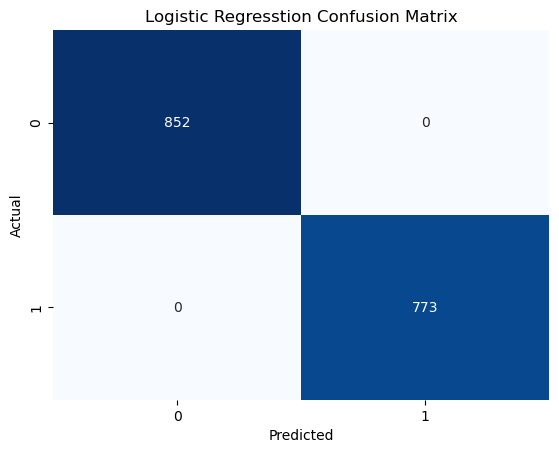

In [54]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Logistic Regresstion Confusion Matrix');

# Support Vector Machine

In [55]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [56]:
svm_train_acc = round(accuracy_score(y_train,svm.predict(X_train))*100,2)
print('Training Accuracy = ' , svm_train_acc,' %')

Training Accuracy =  100.0  %


In [57]:
y_pred = svm.predict(X_test)
svm_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Testing Accuracy = ' , svm_test_acc,' %')

Testing Accuracy =  100.0  %


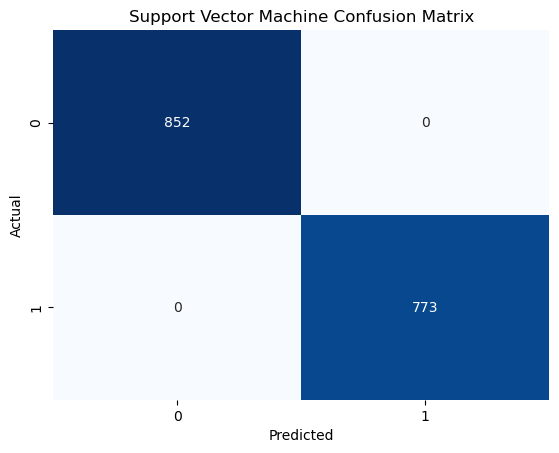

In [58]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Support Vector Machine Confusion Matrix');

# Random Forest

In [59]:
rdm_frst = RandomForestClassifier(n_estimators=100)
rdm_frst.fit(X_train,y_train)

RandomForestClassifier()

In [60]:
rdm_train_acc = round(accuracy_score(y_train,rdm_frst.predict(X_train))*100,2)
print('Training Accuracy = ' , rdm_train_acc,' %')

Training Accuracy =  100.0  %


In [61]:
y_pred = rdm_frst.predict(X_test)
rdm_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Testing Accuracy = ' , rdm_test_acc,' %')

Testing Accuracy =  100.0  %


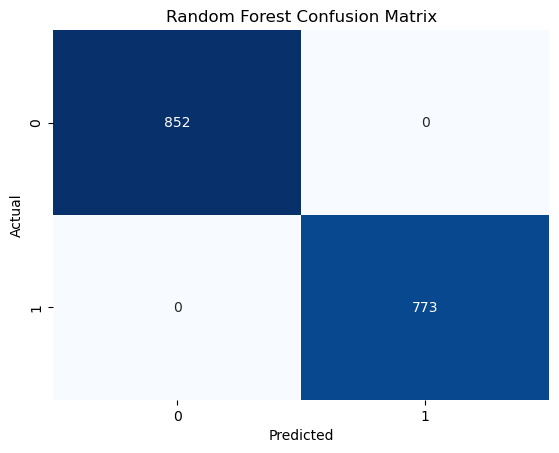

In [62]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Random Forest Confusion Matrix');

In [17]:
lr_model = LogisticRegression()
svm_model = SVC()
rf_model = RandomForestClassifier()

# Logistic Regression

In [18]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],        
    'penalty': ['l1', 'l2'],                    
    'solver': ['liblinear', 'lbfgs', 'newton-cg'] 
}

param_rand = {
    'C': uniform(0.001, 100),         
    'penalty': ['l1', 'l2'],          
    'solver': ['liblinear', 'lbfgs']  
}

# Grid, Logistic Regression

In [19]:
grid_search = GridSearchCV(lr_model, param_grid, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg']})

In [20]:
best_glr_params = grid_search.best_params_
print("Best Hyperparameters:", best_glr_params)
best_glr_model = LogisticRegression(**best_glr_params)
best_glr_model.fit(X_train, y_train)

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [21]:
glr_train_acc = round(accuracy_score(y_train,best_glr_model.predict(X_train))*100,2)
print('Training Accuracy = ' , glr_train_acc,' %')

Training Accuracy =  100.0  %


In [22]:
y_pred = best_glr_model.predict(X_test)
glr_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Testing Accuracy = ' , glr_test_acc,' %')

Testing Accuracy =  100.0  %


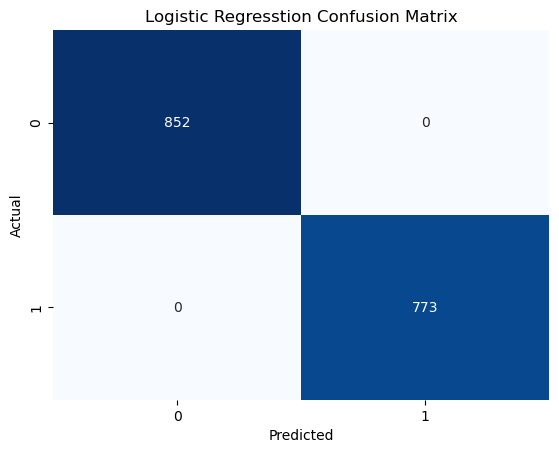

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Logistic Regresstion Confusion Matrix');

# Random, Logistic Regression

In [24]:
random_search = RandomizedSearchCV(lr_model, param_rand, cv=10)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000182035148E0>,
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'lbfgs']})

In [25]:
best_rlr_params = random_search.best_params_
print("Best Hyperparameters:", best_rlr_params)
best_rlr_model = LogisticRegression(**best_rlr_params)
best_rlr_model.fit(X_train, y_train)

Best Hyperparameters: {'C': 13.05655986381327, 'penalty': 'l2', 'solver': 'lbfgs'}


LogisticRegression(C=13.05655986381327)

In [26]:
rlr_train_acc = round(accuracy_score(y_train,best_rlr_model.predict(X_train))*100,2)
print('Training Accuracy = ' , rlr_train_acc,' %')

Training Accuracy =  100.0  %


In [27]:
y_pred = best_rlr_model.predict(X_test)
rlr_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Testing Accuracy = ' , rlr_test_acc,' %')

Testing Accuracy =  100.0  %


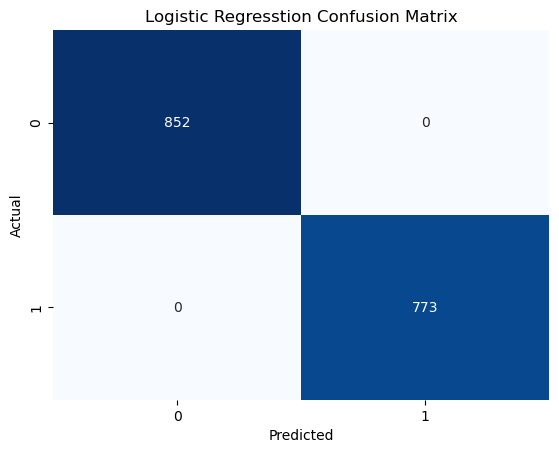

In [28]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Logistic Regresstion Confusion Matrix');

# SVC

In [29]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': [0.1, 1, 'auto']
}

param_rand = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(uniform(0.1, 1).rvs(5))
}

# Grid, SVC

In [30]:
grid_search = GridSearchCV(svm_model, param_grid, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [31]:
best_gsvm_params = grid_search.best_params_
print("Best Hyperparameters:", best_gsvm_params)
best_gsvm_model = SVC(**best_gsvm_params)
best_gsvm_model.fit(X_train, y_train)

Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}


SVC(C=0.1, gamma=0.1, kernel='poly')

In [32]:
gsvm_train_acc = round(accuracy_score(y_train,best_gsvm_model.predict(X_train))*100,2)
print('Training Accuracy = ' , gsvm_train_acc,' %')

Training Accuracy =  100.0  %


In [33]:
y_pred = best_gsvm_model.predict(X_test)
gsvm_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Testing Accuracy = ' , gsvm_test_acc,' %')

Testing Accuracy =  100.0  %


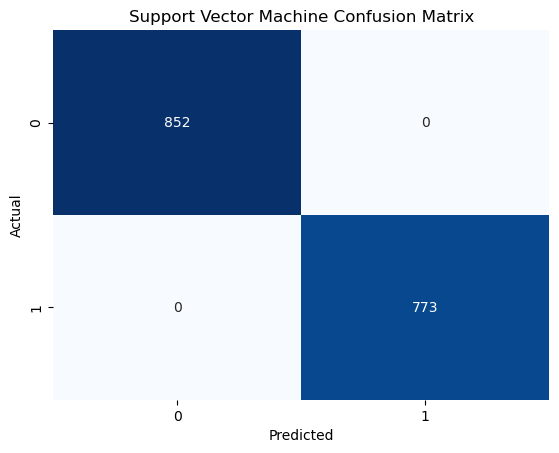

In [34]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Support Vector Machine Confusion Matrix');

# Random, SVC

In [35]:
random_search = RandomizedSearchCV(svm_model, param_rand, cv=10)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001820341AA30>,
                                        'gamma': ['scale', 'auto',
                                                  0.8964146976226974,
                                                  0.47058634657744924,
                                                  0.4495330361284847,
                                                  0.6687137164821957,
                                                  0.4947863894581215],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']})

In [36]:
best_rsvm_params = random_search.best_params_
print("Best Hyperparameters:", best_rsvm_params)
best_rsvm_model = SVC(**best_rsvm_params)
best_rsvm_model.fit(X_train, y_train)

Best Hyperparameters: {'C': 3.684286716706661, 'gamma': 0.47058634657744924, 'kernel': 'rbf'}


SVC(C=3.684286716706661, gamma=0.47058634657744924)

In [37]:
rsvm_train_acc = round(accuracy_score(y_train,best_rsvm_model.predict(X_train))*100,2)
print('Training Accuracy = ' , rsvm_train_acc,' %')

Training Accuracy =  100.0  %


In [38]:
y_pred = best_rsvm_model.predict(X_test)
rsvm_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Testing Accuracy = ' , rsvm_test_acc,' %')

Testing Accuracy =  100.0  %


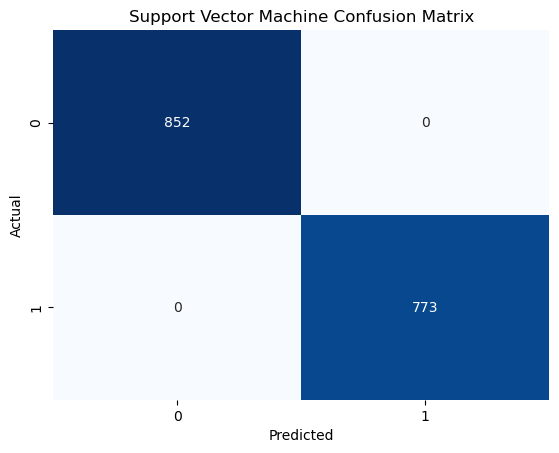

In [39]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Support Vector Machine Confusion Matrix');

# Random Forest

In [40]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_rand = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Grid, Random Forest

In [41]:
grid_search = GridSearchCV(rf_model, param_grid, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [42]:
best_grf_params = grid_search.best_params_
print("Best Hyperparameters:", best_grf_params)
best_grf_model = RandomForestClassifier(**best_grf_params)
best_grf_model.fit(X_train, y_train)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


RandomForestClassifier(n_estimators=50)

In [43]:
grf_train_acc = round(accuracy_score(y_train,best_grf_model.predict(X_train))*100,2)
print('Training Accuracy = ' , grf_train_acc,' %')

Training Accuracy =  100.0  %


In [44]:
y_pred = best_grf_model.predict(X_test)
grf_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Testing Accuracy = ' , grf_test_acc,' %')

Testing Accuracy =  100.0  %


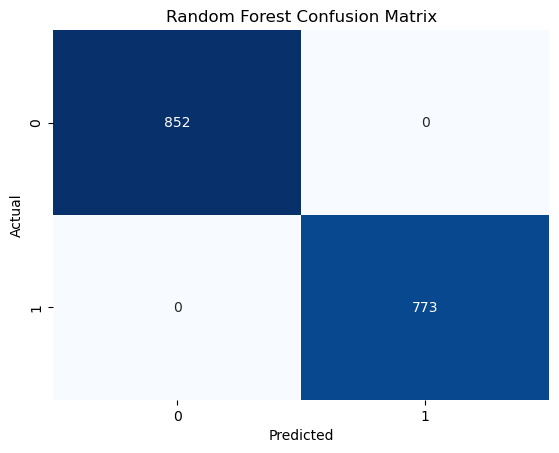

In [45]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Random Forest Confusion Matrix');

# Random, Random Forest

In [46]:
random_search = RandomizedSearchCV(rf_model, param_rand, cv=10)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000182045CEDF0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000182045E60D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000182045D7A60>})

In [47]:
best_rrf_params = random_search.best_params_
print("Best Hyperparameters:", best_rrf_params)
best_rrf_model = RandomForestClassifier(**best_rrf_params)
best_rrf_model.fit(X_train, y_train)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 154}


RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=9,
                       n_estimators=154)

In [48]:
rrf_train_acc = round(accuracy_score(y_train,best_rrf_model.predict(X_train))*100,2)
print('Training Accuracy = ' , rrf_train_acc,' %')

Training Accuracy =  100.0  %


In [49]:
y_pred = best_rrf_model.predict(X_test)
rrf_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Testing Accuracy = ' , rrf_test_acc,' %')

Testing Accuracy =  100.0  %


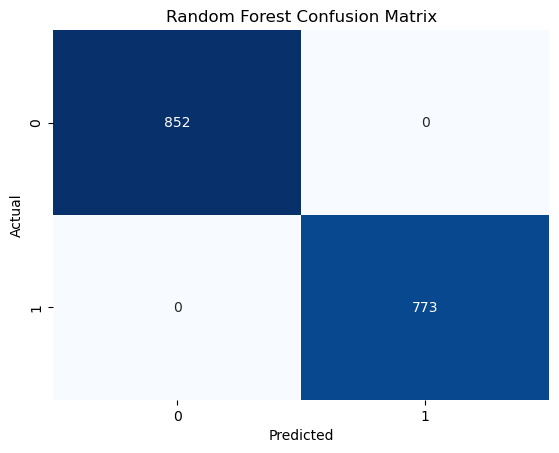

In [50]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Random Forest Confusion Matrix');

In [63]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines','Random Forest'],
    
    'Training Accuracy': [lr_train_acc,svm_train_acc,rdm_train_acc],
    
    'Testing Accuracy': [lr_test_acc,svm_test_acc,rdm_test_acc],
    
    'Best Grid Param':[best_glr_params,best_gsvm_params,best_grf_params],
    
    'Grid Train Acc':[glr_train_acc,gsvm_train_acc,grf_train_acc],
    
    'Grid Test Acc':[glr_test_acc,gsvm_test_acc,grf_test_acc],
    
    'Best Random Param':[best_rlr_params,best_rsvm_params,best_rrf_params],
    
    'Random Train Acc':[rlr_train_acc,rsvm_train_acc,rrf_train_acc],
    
    'Random Test Acc':[rlr_test_acc,rsvm_test_acc,rrf_test_acc]
})

In [64]:
models.sort_values(by=['Testing Accuracy','Training Accuracy'], ascending=False).style.background_gradient(cmap='coolwarm')

,Model,Training Accuracy,Testing Accuracy,Best Grid Param,Grid Train Acc,Grid Test Acc,Best Random Param,Random Train Acc,Random Test Acc
0,Logistic Regression,100.000000,100.000000,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",100.000000,100.000000,"{'C': 13.05655986381327, 'penalty': 'l2', 'solver': 'lbfgs'}",100.000000,100.000000
1,Support Vector Machines,100.000000,100.000000,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",100.000000,100.000000,"{'C': 3.684286716706661, 'gamma': 0.47058634657744924, 'kernel': 'rbf'}",100.000000,100.000000
2,Random Forest,100.000000,100.000000,"{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}",100.000000,100.000000,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 154}",100.000000,100.000000
